/home/gf/packages/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


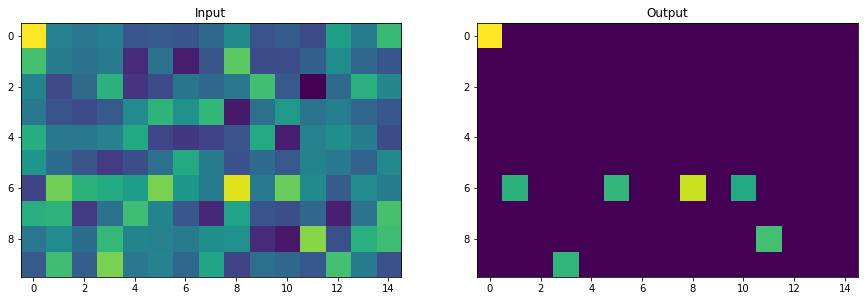

In [1]:
%matplotlib inline

from shutil import rmtree
import numpy as np
import pylab as plt
import ngene as ng

nx,ny,n_channel = 10,15,1

def data(n):
    x = []
    for i in range(n):
        x.append(np.random.normal(0,1,(nx,ny)))
    return np.expand_dims(np.array(x),axis=-1)

def truth(x,noise=0):
    shp = x.shape
    y = np.zeros(shp)
    n = shp[0]
    for i in range(n):
        y[i] = x[i]+0
        y[i][y[i]<2]=0
        
    if noise!=0:
        y= y+noise*x
    return y

def data_provider(n):
    x = data(n)
    y = truth(x)
    return x,y

fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,7))

x = data(3)
y = truth(x,0.0)

ax1.imshow(x[0,:,:,0])
ax1.set_title('Input')
ax2.imshow(y[0,:,:,0])
ax2.set_title('Output');

In [2]:
import tensorflow as tf
def architecture(x_in):
    
#     x = tf.layers.conv2d(x_in,filters=16,kernel_size=5,strides=(1, 1),padding='same',
#             activation=tf.nn.relu)
#     x = tf.layers.conv2d(x,filters=16,kernel_size=5,strides=(1, 1),padding='same',
#             activation=tf.nn.relu)

#     x_out = tf.layers.conv2d(x,filters=1,kernel_size=5,strides=(1, 1),padding='same',
#             activation=tf.nn.relu)

    initzer = tf.contrib.layers.xavier_initializer()
    # initzer = tf.contrib.layers.variance_scaling_initializer()
    x = tf.layers.conv2d(x_in,filters=12,
                        kernel_size=5,
                        padding='SAME',
                        kernel_initializer=initzer,
                        kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                        bias_initializer=tf.constant_initializer(0.1),
                        name='conv_1')
    x = tf.layers.batch_normalization(x,name='norm_1')
    x = tf.nn.relu(x,name='act_1')

    x = tf.layers.conv2d(x,filters=12,
                        kernel_size=5,
                        padding='SAME',
                        kernel_initializer=initzer,
                        kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                        bias_initializer=tf.constant_initializer(0.1),
                        name='conv_2')
    x = tf.layers.batch_normalization(x,name='norm_2')
    x = tf.nn.relu(x,name='act_2')

    x = tf.layers.conv2d(x,filters=1,
                        kernel_size=5,
                        padding='SAME',
                        kernel_initializer=initzer,
                        kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                        bias_initializer=tf.constant_initializer(0.1),
                        name='conv_3')
    x = tf.layers.batch_normalization(x,name='norm_3')
    x_out = tf.nn.relu(x,name='act_3')
    return x_out

# architecture = 'arch_1'
model = ng.Model(data_provider,restore=False,model_add='./model',arch=architecture)

print('# of variables:',model.n_variables)

# of variables: 4275


In [3]:
model.train(data_provider=data_provider,training_epochs = 10,iterations=200 ,n_s = 100,
                    learning_rate = 0.01, time_limit=None,
                    metric=None, verbose=1,death_preliminary_check = 30,
                    death_frequency_check = 1000)

Warning! Dead model! Reinitiating (167/100000)...(2, 5)
Epoch:0, cost= 2721.003416
(3, 5)
Epoch:1, cost= 684.671441
(4, 5)
Epoch:2, cost= 421.357148
(5, 5)
Epoch:3, cost= 263.870994
(6, 5)
Epoch:4, cost= 209.525281
(7, 5)
Epoch:5, cost= 184.501066
(8, 5)
Epoch:6, cost= 167.023522
(9, 5)
Epoch:7, cost= 154.206174
(10, 5)
Epoch:8, cost= 149.855345
(11, 5)
Epoch:9, cost= 141.972713


Text(0.5,1,'Prediction')

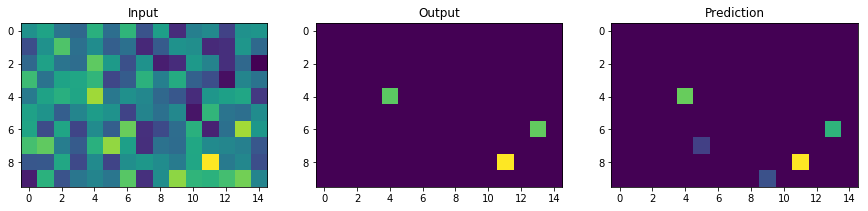

In [4]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,7))

x = data(1)
y = truth(x,0.0)
x_pred = model.predict(x)

ax1.imshow(x[0,:,:,0])
ax1.set_title('Input')
ax2.imshow(y[0,:,:,0])
ax2.set_title('Output')
ax3.imshow(x_pred[0,:,:,0])
ax3.set_title('Prediction')

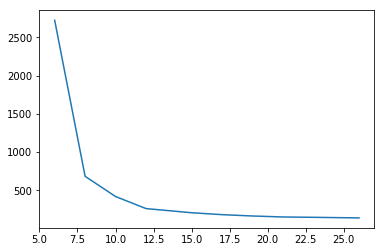

In [5]:
time_steps = np.array([model.sw.array2sec(i) for i in model.training_time])[1:]
losses = model.loss[1:]
plt.plot(time_steps,losses)

In [1]:
import tensorflow as tf
import numpy as np

/home/gf/packages/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_in = tf.placeholder(tf.float32,[3,10,10,4])

initzer = tf.contrib.layers.xavier_initializer()
x = tf.layers.conv2d(x_in,filters=12,
                    kernel_size=5,
                    padding='SAME',
                    kernel_initializer=initzer,
                    kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                    bias_initializer=tf.constant_initializer(0.1),
                    name='conv_1')

f = tf.reshape(x, [-1])
mean, var = tf.nn.moments(f, axes=[0])
zero = tf.constant(0,dtype=var.dtype)
d = tf.equal(var,zero)
    
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [3]:
dd,mm = sess.run([d,mean],feed_dict={x_in:np.random.normal(0,1,(3,10,10,4))})

In [6]:
dd

False

In [269]:
try:
    tf.reset_default_graph()
    rmtree('./logs')
except:
    pass
try:
    sess.close()
except:
    pass



n_batch = None
x_in = tf.placeholder(tf.float32,[n_batch,nx,ny,n_channel])
y_true = tf.placeholder(tf.float32,[n_batch,nx,ny,1])
learning_rate = tf.placeholder(tf.float32)

# check_death = tf.placeholder(tf.bool)

# x = tf.layers.conv2d(x_in,filters=16,kernel_size=5,strides=(1, 1),padding='same',
#         activation=tf.nn.relu)
# x = tf.layers.conv2d(x,filters=16,kernel_size=5,strides=(1, 1),padding='same',
#         activation=tf.nn.relu)

# x_out = tf.layers.conv2d(x,filters=1,kernel_size=5,strides=(1, 1),padding='same',
#         activation=tf.nn.relu)

initzer = tf.contrib.layers.xavier_initializer()
# initzer = tf.contrib.layers.variance_scaling_initializer()
x = tf.layers.conv2d(x_in,filters=12,
                    kernel_size=5,
                    padding='SAME',
                    kernel_initializer=initzer,
                    kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                    bias_initializer=tf.constant_initializer(0.1),
                    name='conv_1')
x = tf.layers.batch_normalization(x,name='norm_1')
x = tf.nn.relu(x,name='act_1')

x = tf.layers.conv2d(x,filters=12,
                    kernel_size=5,
                    padding='SAME',
                    kernel_initializer=initzer,
                    kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                    bias_initializer=tf.constant_initializer(0.1),
                    name='conv_2')
x = tf.layers.batch_normalization(x,name='norm_2')
x = tf.nn.relu(x,name='act_2')

x = tf.layers.conv2d(x,filters=1,
                    kernel_size=5,
                    padding='SAME',
                    kernel_initializer=initzer,
                    kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.05),
                    bias_initializer=tf.constant_initializer(0.1),
                    name='conv_3')
x = tf.layers.batch_normalization(x,name='norm_3')
x_out = tf.nn.relu(x,name='act_3')
r_zeros = tf.nn.zero_fraction(x_out)

cost = tf.reduce_sum(tf.pow(y_true - x_out, 2))
# cost = tf.losses.huber_loss(y_true,x_out)
# cost = tf.losses.log_loss(y_true,x_out)
# cost = tf.losses.mean_pairwise_squared_error(y_true,x_out)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

tf.summary.image("in_out", tf.concat([x_in[:1,:,:,:1],x_out[:1,:,:,:1]],axis=0), max_outputs=2),
tf.summary.scalar('cost', cost)
merge = tf.summary.merge_all()

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

writer = tf.summary.FileWriter( './logs/train', sess.graph)

In [271]:
counter = 0
learning_r = 0.01

logg = False
death = True
death_preliminary_check = 10
death_frequency_check = 1000
not_dead = 0

for i in range(1000):
    x = data(100)
    y = truth(x,0.0)
    
    counter += 1
    if (not logg) & (not death): 
        summary, _, c = sess.run([merge,optimizer, cost], feed_dict=
                     {x_in: x, y_true: y, learning_rate: learning_r})
        writer.add_summary(summary, counter)
    elif logg:
        _, c = sess.run([optimizer, cost], feed_dict=
                         {x_in: x, y_true: y, learning_rate: learning_r}) 
    elif death or (counter%death_frequency_check==0 and death_frequency_check):     
        rr,_, c = sess.run([r_zeros,optimizer, cost], feed_dict=
                         {x_in: x, y_true: y, learning_rate: learning_r}) 
        if rr==1.:
            sess.run(init)
            not_dead = 0
            death = True
        else:
            not_dead += 1
        if not_dead>=death_preliminary_check:
            death = False
#         print(rr)
    
    if i%50==0:
        print(c)

2138.0422
2073.678
486.40997
343.7915
291.4826
194.78265
120.8762
96.143036
105.58545
71.15138
87.25899
87.294876
81.6729
104.21877
54.094948
66.10851
65.79318
50.931816
51.286366
76.134186


{'images': ['in_out/image/0', 'in_out/image/1'], 'audio': [], 'histograms': [], 'scalars': ['cost'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': True, 'run_metadata': []}


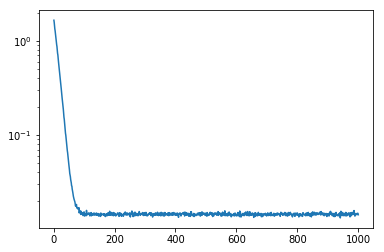

In [27]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from glob import glob

summary_file = glob('./logs/train/events.out.tfevents.*')[0]
event_acc = EventAccumulator(summary_file)
event_acc.Reload()
# Show all tags in the log file
print(event_acc.Tags())

w_times, step_nums, vals = zip(*event_acc.Scalars('cost'))
plt.plot(step_nums,vals)
plt.yscale('log')

In [16]:
# event_acc.Images('In/image/0')

In [17]:
w_times,step_nums,imgs,width, height = zip(*event_acc.Images('in_out/image/0'))
step_nums

(548, 783, 817, 1000)

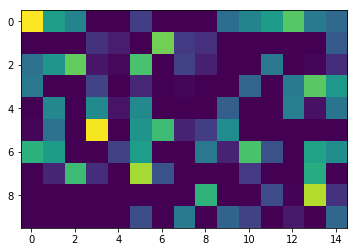

In [104]:
image_str = tf.placeholder(tf.string)
im_tf = tf.image.decode_image(image_str)

img = sess.run(im_tf,{image_str: imgs[1]})
plt.imshow(img[:,:,0])

In [36]:
import rficnn as rfc
files_list=['/home/gf/works/RFI/data/hide_sims_train/calib_1year/TEST_MP_PXX_20160102_000000.fits']
dpt = rfc.DataProvider(a_min=0,
                       a_max=200, files=files_list,
                       label_name='RFI_MASK')

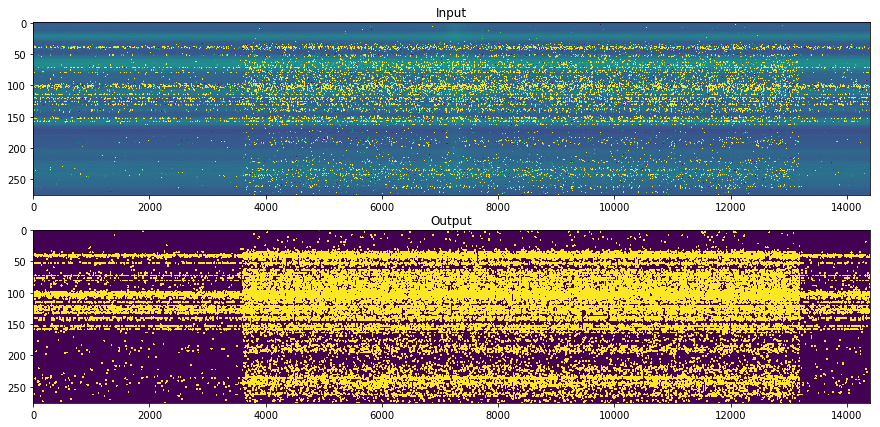

In [37]:
x,y = dpt(1)
fig,(ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(15,7))

ax1.imshow(x[0,:,:,0],aspect='auto')
ax1.set_title('Input')
ax2.imshow(y[0,:,:,0],aspect='auto')
ax2.set_title('Output');

In [23]:
y.shape

(1, 10, 15, 1)